In [1]:
import numpy as np

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.measure
import skimage.morphology
import skimage.segmentation

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


//anaconda/envs/py36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


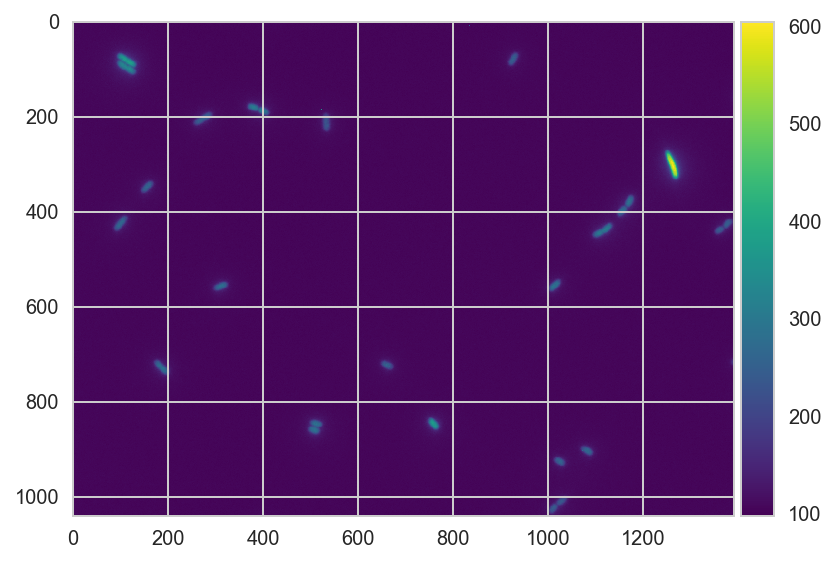

In [2]:
im_phase = skimage.io.imread('data/HG105_images/noLac_phase_0004.tif')
im_FL = skimage.io.imread('data/HG105_images/noLac_FITC_0004.tif')

skimage.io.imshow(im_FL)


In [3]:
#noise filtering (median)
selem = skimage.morphology.square(3)
im_FL_filt = skimage.filters.median(im_FL, selem)
im_phase_filt = skimage.filters.median(im_phase, selem)

//anaconda/envs/py36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


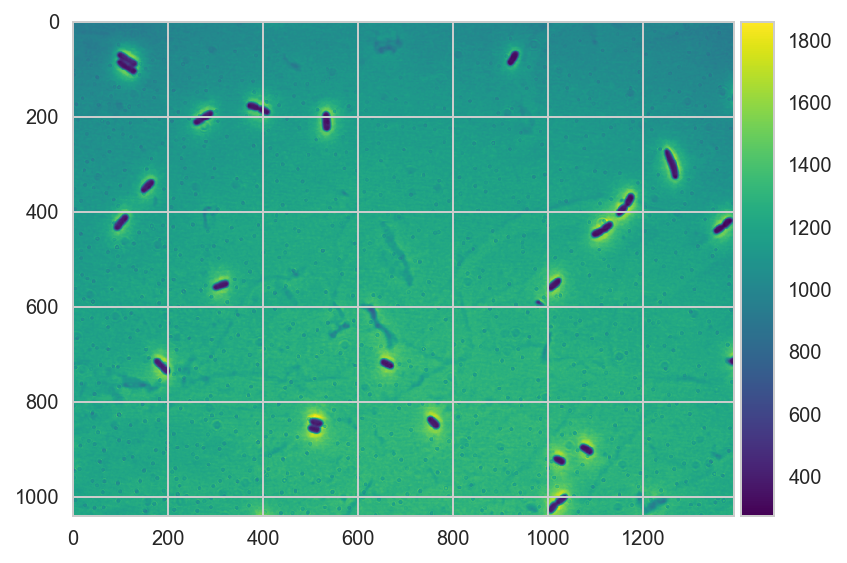

In [4]:
skimage.io.imshow(im_phase_filt)

//anaconda/envs/py36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


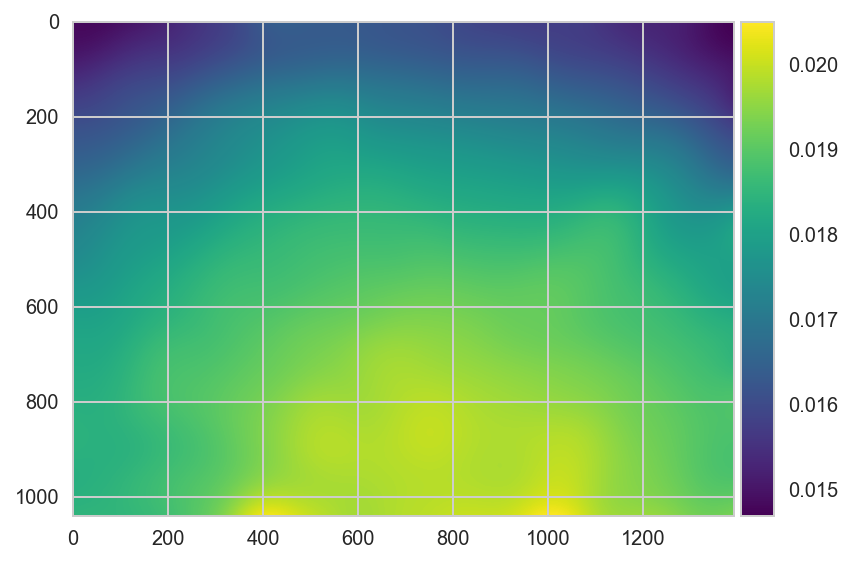

In [5]:
# background substraction using a gaussian blur
im_phase_bg = skimage.filters.gaussian(im_phase_filt, 50.0)
skimage.io.imshow(im_phase_bg)

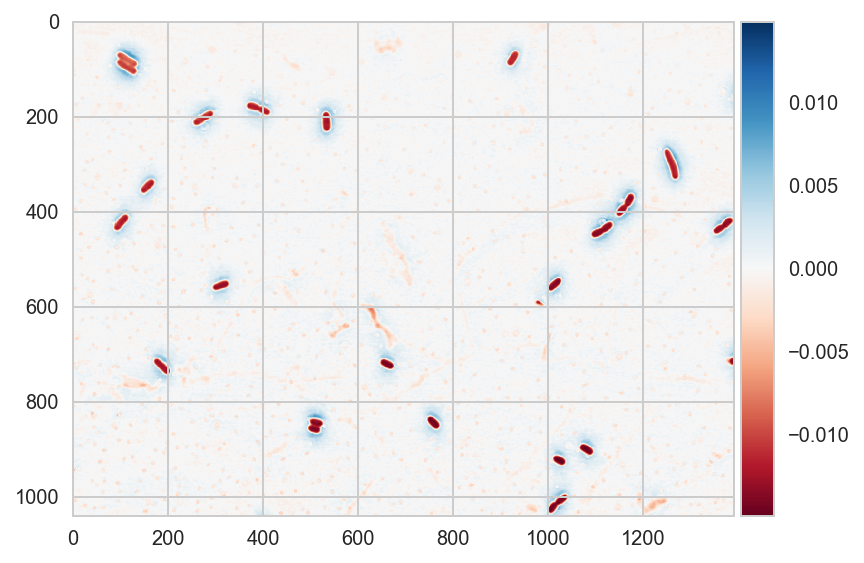

In [6]:
# bg is a float, the image is an int. need to convert before substraction
im_phase_sub = skimage.img_as_float(im_phase_filt) - im_phase_bg
skimage.io.imshow(im_phase_sub)

//anaconda/envs/py36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


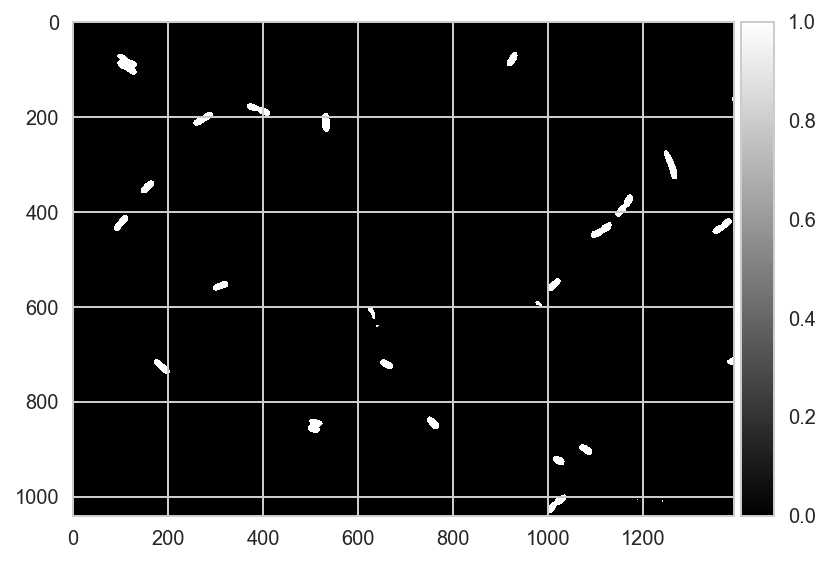

In [7]:
# thresholding
thresh_otsu = skimage.filters.threshold_otsu(im_phase_sub)
im_bw = im_phase_sub < thresh_otsu
skimage.io.imshow(im_bw, cmap=plt.cm.gray)

In [8]:
# border clearing (only works on black and white images!)
im_bw = skimage.segmentation.clear_border(im_bw)

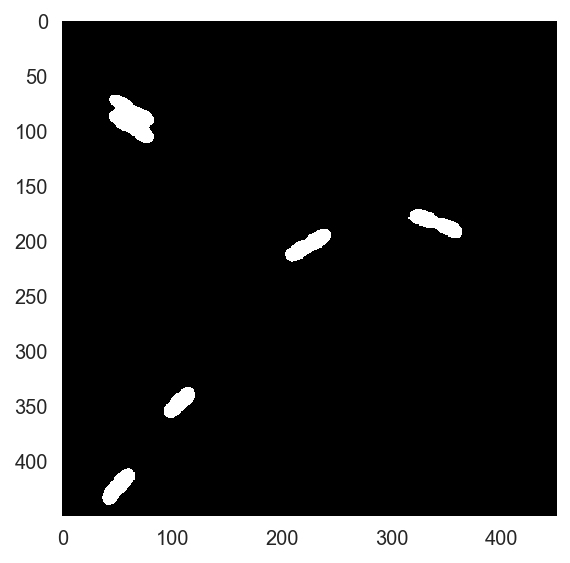

In [9]:
#numpy slice object
slc = np.s_[0:450, 50:500]

with sns.axes_style('dark'):
    skimage.io.imshow(im_bw[slc], cmap=plt.cm.gray)

//anaconda/envs/py36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


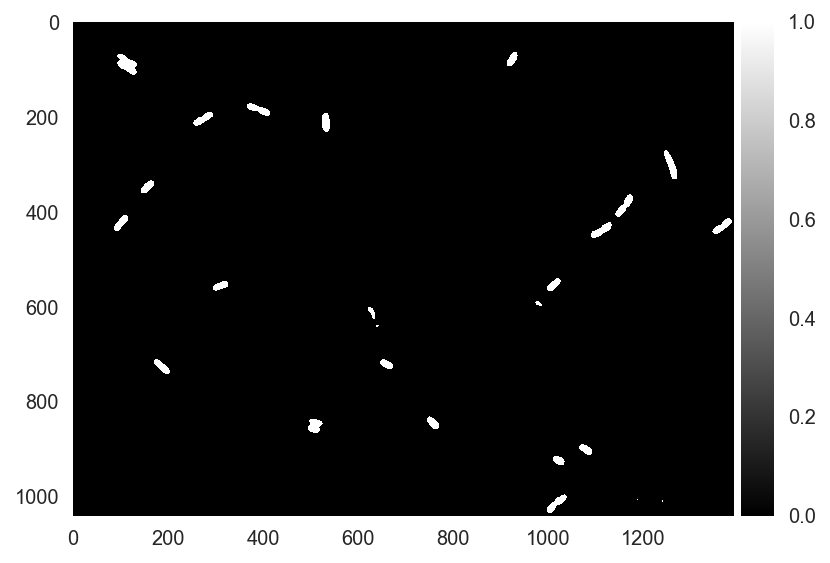

In [10]:
with sns.axes_style('dark'):
    skimage.io.imshow(im_bw, cmap=plt.cm.gray)

//anaconda/envs/py36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


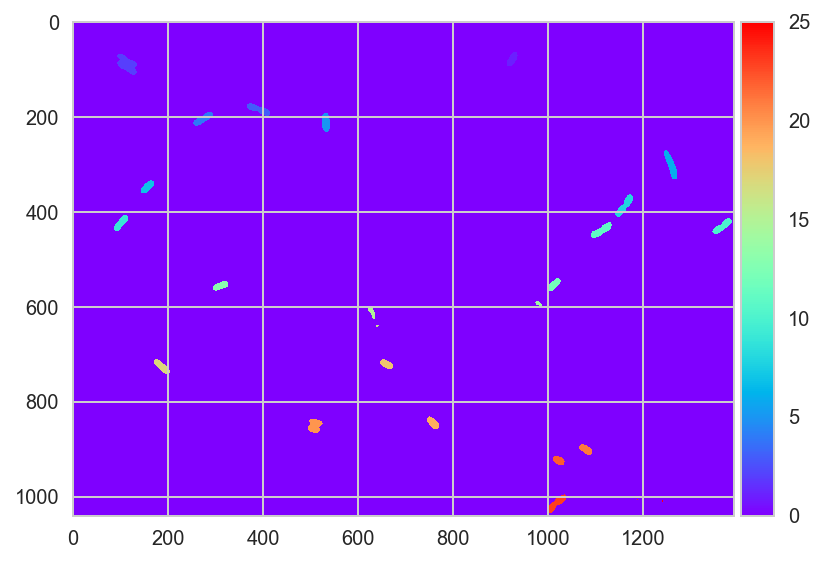

In [11]:
# labeling cells/regions for subsequent analysis. corresponding cells in the array have the specific number of the label
im_labeled = skimage.measure.label(im_bw, background=0)
skimage.io.imshow(im_labeled, cmap=plt.cm.rainbow)

In [12]:
# computes many attribues by labels, and subsequently looks at the intensity of 
# the fluorescent image

im_props = skimage.measure.regionprops(im_labeled, intensity_image=im_FL_filt)
len(im_props)

25

In [13]:
prop = im_props[0]


In [14]:
#filter by size. 

im_bw_filt = im_labeled > 0 
cutoff = 200
for prop in im_props:
    if prop.area < cutoff:
        im_bw_filt[im_labeled==prop.label] = 0#boolean slicing of numpy array. 
        
im_labeled = skimage.measure.label(im_bw_filt)
im_props = skimage.measure.regionprops(im_labeled,intensity_image=im_FL_filt)
len(im_props)

20

//anaconda/envs/py36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


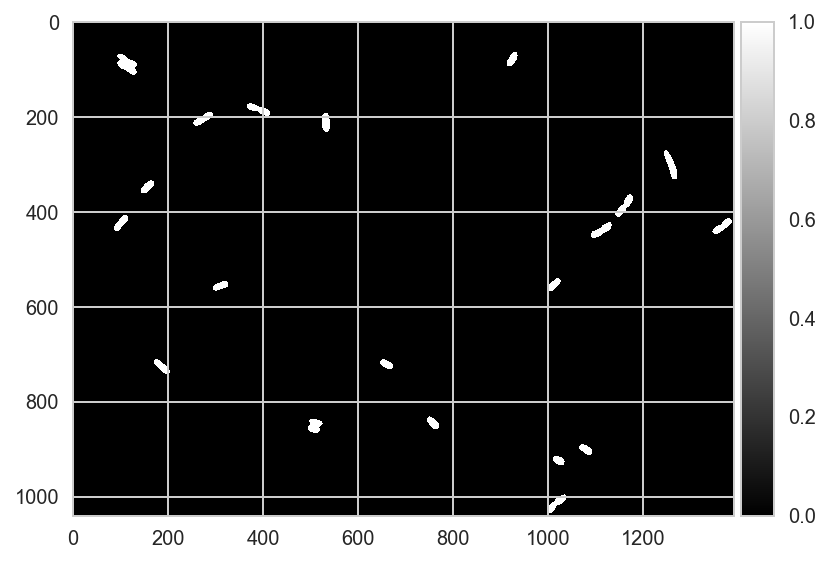

In [15]:
skimage.io.imshow(im_bw_filt, cmap = plt.cm.gray)

In [16]:
# calculate integrate intesity
int_intensity = [prop.area * prop.mean_intensity for prop in im_props]

In [17]:
int_intensity

[85167.0,
 328888.0,
 153205.0,
 125405.0,
 110639.99999999999,
 367573.0,
 94001.0,
 164550.0,
 113119.0,
 120545.0,
 160980.0,
 97293.0,
 95855.0,
 118286.0,
 77723.0,
 118638.0,
 155136.0,
 85448.0,
 75193.0,
 128359.99999999999]

In [18]:
len(int_intensity)

20